In [1]:
"""###############################################################################
Beschreibung:

In der Politikwissenschaft wird das Phänomen diskutiert, dass bei Wahlen Parteien
aus dem rechten Spektrum ausgerechnet dort viele Stimmen erhalten, wo der Anteil
an Menschen mit Migrationshintergrund außergewöhnlich niedrig ist.

Das folgende Skript visualisiert die Korrelation von Wahlergebnis und Migrations-
hintergrund für eine dieser Parteien.

Datenbasis: 
Wahlergebnisse BTW 2021 von https://www.bundeswahlleiter.de/
Migrationshintergrund aus der Zensusdatenbank (Tabelle 2000S-1009 transponiert)
"""###############################################################################

import pandas as pd
import seaborn as sns

#Import Wahl CSV
wahl_data = pd.read_csv("kerg2.csv", sep=';', skiprows = 9, decimal=",")

In [2]:
# Ländersummen aus Originaldatei nehmen
wahl_laendersumme = wahl_data[wahl_data["Gebietsart"]=="Land"]

In [3]:
#Filtern nach Zweitstimme und Tabellenstruktur
wahl_laendersumme_zweitst = wahl_laendersumme[wahl_laendersumme["Stimme"]==2]

In [4]:
#Import MIGH CSV
migh_data = pd.read_csv("2000S-1009 (1).csv", sep=';', skiprows = 6, skipfooter=3, engine='python', encoding="1252")

In [5]:
#Spaltenbezeichnungen für Gebietsnummern und BL hinzufügen und Index setzen
migh_laender =  migh_data.rename(columns={"Unnamed: 0": "Gebietsnummer", "Unnamed: 1": "Bundesländer"}).set_index("Gebietsnummer")

In [6]:
#Zusammenfügen der Datensätze, Index = Gebietsnummer
wahl_migh = wahl_laendersumme_zweitst.merge(migh_laender , on='Gebietsnummer')

In [7]:
#Berechnung der Quote Migrationshintergrund
wahl_migh["Migrationshintergrund Quote"] =  wahl_migh["Personen mit Migrationshintergrund"] / wahl_migh["Insgesamt"] *100

#Änderung: Quote als Index eingefügt
wahl_migh_pivot = wahl_migh.pivot_table(index=['Gebietsnummer', 'Gebietsname', 'Migrationshintergrund Quote'], columns=['Gruppenname'], values='Prozent')

In [8]:
#Alle Parteien entfernen, außer den im BT vertretenen
wahl_migh_pivot.drop(wahl_migh_pivot.columns.difference(['SPD','CDU','GRÜNE','FDP','AfD','DIE LINKE', 'CSU']), 1, inplace=True)

In [9]:
#Änderung: reset_index
wahl_migh_pivot.reset_index(inplace=True)

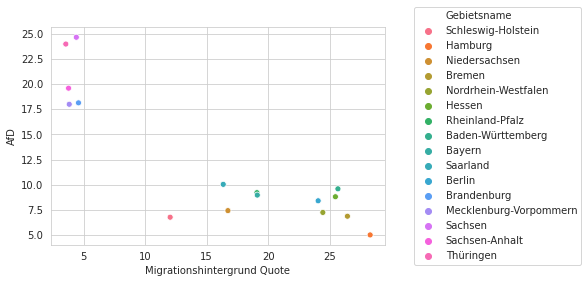

In [9]:
#Visualisierung mit Seaborn
sns.set_style("whitegrid")
g = sns.scatterplot(data=wahl_migh_pivot, x="Migrationshintergrund Quote", y="AfD", hue="Gebietsname")
g.legend(loc='right', bbox_to_anchor=(1.6, 0.5), ncol=1)

In [10]:
#Test Korrelationskoeffizient
from scipy.stats import pearsonr

x = wahl_migh_pivot["Migrationshintergrund Quote"]
y = wahl_migh_pivot["AfD"]

corr, _ = pearsonr(x, y)
print('Korrelationskoeffizient nach Pearson: %.3f' % corr)

Korrelationskoeffizient nach Pearson: -0.868
